# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most important functions of the beautiful scikit-learn library.

What are we going to cover:
    
0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/model/algorithm for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end scikit-learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd

In [2]:
import numpy as np

In [3]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Seperate the features and the target variables from the dataset
# Create a feature matrix (X)
X = heart_disease.drop("target",axis=1)

# Create a label matrix (y)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters we can see those hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train,y_train);

In [8]:
# Make a prediction 
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [9]:
y_test

214    0
181    0
56     1
22     1
213    0
      ..
38     1
256    0
33     1
130    1
45     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate our model on the training set and the test set
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test,y_test)

0.8032786885245902

In [12]:
# Evaulating further with the help of some other evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.83      0.83      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[20,  6],
       [ 6, 29]])

In [15]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [16]:
# 5. Improve the model 
# (Usually we try by changing some hyperparameters, here we will experiment by tunning the n_estimators hyperparameter)
np.random.seed(42)
for i in range(10,110,10):
    print(f"Fitting the model with the number of estimators = {i}")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    y_preds = clf.predict(X_test)
    print(f"Accuracy score for the model with {i} estimators = {accuracy_score(y_test,y_preds) * 100:.2f}%")
    print("")

Fitting the model with the number of estimators = 10
Accuracy score for the model with 10 estimators = 75.41%

Fitting the model with the number of estimators = 20
Accuracy score for the model with 20 estimators = 81.97%

Fitting the model with the number of estimators = 30
Accuracy score for the model with 30 estimators = 80.33%

Fitting the model with the number of estimators = 40
Accuracy score for the model with 40 estimators = 81.97%

Fitting the model with the number of estimators = 50
Accuracy score for the model with 50 estimators = 80.33%

Fitting the model with the number of estimators = 60
Accuracy score for the model with 60 estimators = 80.33%

Fitting the model with the number of estimators = 70
Accuracy score for the model with 70 estimators = 83.61%

Fitting the model with the number of estimators = 80
Accuracy score for the model with 80 estimators = 83.61%

Fitting the model with the number of estimators = 90
Accuracy score for the model with 90 estimators = 85.25%

F

In [17]:
# 6. Save a model and load it.
# Here the last model state where n_estimators value is 100 will be saved.
import pickle

pickle.dump(clf, open("../random_forest_model_classifier_1.pkl", "wb"))

In [18]:
# Load the saved model
loaded_model = pickle.load(open("../random_forest_model_classifier_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

# Now we will explore each step one by one in depth 

Let's begin ....

## 1. Getting our data ready to be used with machine learning

Three main things we need to do:
1. Split the data into features and labels (Usually `X` and `y`).
2. Filling (also called Imputing) or disregarding missing values.
3. Converting non-numerical values to numerical values (also called feature encoding).

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape[0] * 0.2 # Number of rows in the test set

60.6

## 1.1 Make sure the data is numerical.

We will try to make the data numerical where the data is not in some numerical form.

In [25]:
car_sales = pd.read_csv("../scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
# Split the data into X,y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [28]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# Build Machine learning model 
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [30]:
# Doors though has numerical value it is a categorical variable as it divided cars into different categories based on number of doors.
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [31]:
# We will get an error like above if the data is non-numerical as our model won't be able to make sense of it.
# Here we have the categorical variables Make (Honda,BMW) and Color (White,Blue,etc), Doors is also a categotrical feature.

# Hence we will turn the categories into numbers using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [33]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
# Another way to encode pandas dataframe is using Pandas dumies. 
dummies = pd.get_dummies(X, columns = ["Make","Colour","Doors"])
dummies

,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820,0,0,0,1,1,0,0,0,0,0,1,0
996,155144,0,0,1,0,0,0,0,0,1,1,0,0
997,66604,0,0,1,0,0,1,0,0,0,0,1,0
998,215883,0,1,0,0,0,0,0,0,1,0,1,0


In [35]:
# Let's refit the model as all our data is in numbers.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train,y_train);

In [36]:
model.score(X_train,y_train)

0.891612713353635

In [37]:
model.score(X_test,y_test)

0.3235867221569877

## What if we had missing values?

1. Fill out the missing values (also known as imputing).
2. Remove the missing data altogether.

In [38]:
car_sales_missing = pd.read_csv("../scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
car_sales_missing.info(), car_sales_missing.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


(None, 1000)

In [40]:
# It will give the number of missing values in all columns
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Let's split the data into X and y.
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [42]:
# If we try to apply the OneHotEncoder it will throw an error as we have missing values in our dataset.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Let's fill the missing Data.

### Option 1: Fill the missing data with Pandas

* Generally we fill the missing values of a column with strings by replacing NaN with "missing" or some appropriate string.
* We can fill the missing values of numerical column with something like the mean of all values in that column.

In [43]:
int(car_sales_missing["Doors"].median())

4

In [44]:
# Fill the "Make" column.
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column.
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM) column".
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column.
car_sales_missing["Doors"].fillna(int(car_sales_missing["Doors"].median()), inplace=True)

In [45]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# Price column is the Target/Label column. Hence we need to remove the rows where there are missing Prices. Rather than Imputing with some data.
# We will lose some data by doing this but it is okay.
car_sales_missing.dropna(inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
car_sales_missing.shape # This shows that we lost 50 rows which had missing Price values

(950, 5)

In [49]:
# Let's try to apply OneHotEncoder now.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [50]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [51]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 2 : Filling out the missing data with scikit-learn

In [52]:
car_sales_missing = pd.read_csv("../scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Split into X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [56]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer  # To fill missing values
from sklearn.compose import ColumnTransformer # To use the required transformation to a list of Columns

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns 
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [57]:
# Let's check if there are any missing values left
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [58]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
# Now let's turn the data into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_car_sales_filled = transformer.fit_transform(car_sales_filled)
transformed_car_sales_filled

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [158]:
pd.DataFrame(transformed_car_sales_filled.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [61]:
# Now we have got the data so let's try to fit our model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_car_sales_filled, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_train, y_train)

0.8845872827949007

In [62]:
model.score(X_test, y_test)

0.21990196728583944

# 2. Choosing the right estimator/algorithm for our problem.

Scikit-learn uses estimator as another term for machine learning estimator or model.

* Classification - predicting whether a particular thing is one thing or another.
* Regression - predicting a number.
* Clustering - predicting which category a particular thing belongs to when the categories are not known.

Step - 1 : Check the scikit learn machine learning map....
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking Machine learning model for a Regression problem.

In [63]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
# boston

In [64]:
boston_df = pd.DataFrame(boston["data"], columns=boston.feature_names)
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
# How many samples are there?
len(boston_df)

506

In [66]:
# Let's try the Ridge Regression Model.
from sklearn.linear_model import Ridge

# Setup a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
regressor = Ridge(alpha=0.5)
regressor.fit(X_train, y_train)

# Check the score of the ridge model on test data
regressor.score(X_test, y_test)

0.6675800871276227

In [67]:
regressor.score(X_train, y_train)

0.7500178709433354

In [68]:
# let's try the support vector regression model on the data that we have
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
svr_regressor.score(X_test, y_test)

0.27948125010200286

##### How do we improve the score ?

Here the support vector regressor is clearly not working as we want.

Let's refer back to the map .... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<img alt="scikit-learn-ml-map" />

In [69]:
# Let's try ensemble regressors particularly the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
ensemble_model = RandomForestRegressor()

# Train the model on the training set
ensemble_model.fit(X_train, y_train)

# Check the model's performance on the test set
ensemble_model.score(X_test, y_test)

0.8654448653350507

In [70]:
ensemble_model.score(X_train,y_train)

0.9763520974033731

### 2.2 Choosing an estimator for classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [71]:
heart_disease = pd.read_csv("../scikit-learn-data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [72]:
# How many samples ?
len(heart_disease)

303

Consulting our map and it tells us to use `LinearSVC`

In [73]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intantiate the LinearSVC
linsvc_clf = LinearSVC()

# Train the model on the training set.
linsvc_clf.fit(X_train, y_train)

# Evaluate the model on test set.
linsvc_clf.score(X_test, y_test)

/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [74]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [75]:
# Let's use ensemble estimator
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfc_model = RandomForestClassifier(n_estimators=20000)

# Train the model on the training set.
rfc_model.fit(X_train, y_train)

# Evaluate the model on test set.
rfc_model.score(X_test, y_test)

0.8688524590163934

#### Tidbit :

1. If you have structured data, use ensemble methods.
2. If you have unstructured data, use deep learning or transfer learning.

# 3. Fit the model/algorithm/estimator on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different name for :
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [76]:
# Let's use ensemble estimator
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfc_model = RandomForestClassifier(n_estimators=20000)

# Fit the model on the training set. ------ Here we fit the model so that it can learn patterns from the data provided.
rfc_model.fit(X_train, y_train)

# Evaluate the model on test set. (use the patterns that the machine has learnt)
rfc_model.score(X_test, y_test)

0.8688524590163934

### 3.2 Make predictions using a Machine Learning model

2 main ways to make predictions
1. `predict()`
2. `predict_proba()`

In [77]:
# Use a trained model to make predictions
rfc_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [78]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [79]:
# Compare predictions to truth labels to evauluate the model
y_preds = rfc_model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [80]:
np.mean(y_preds == y_test)

0.8688524590163934

In [81]:
rfc_model.score(X_test, y_test)

0.8688524590163934

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

Make predictions with `predict_proba()`

In [83]:
# predict_proba() returns probabilities of a classification label
rfc_model.predict_proba(X_test[:5])

array([[0.90695, 0.09305],
       [0.4193 , 0.5807 ],
       [0.4638 , 0.5362 ],
       [0.8731 , 0.1269 ],
       [0.20495, 0.79505]])

In [84]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

`predit()` can also be used with regression models.

In [85]:
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Get the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfr_model = RandomForestRegressor()

# Fit the model
rfr_model.fit(X_train,y_train)

# Evaluate the model
rfr_model.score(X_test,y_test)

0.8654448653350507

In [86]:
rfr_model.predict(X_test[:5])

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [87]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred=rfr_model.predict(X_test))

2.136382352941176

In [90]:
# mean_absolute_error()  

# 4. Evaluating a ML model

Three ways to evaluate Scikit-learn models/estimators :
1. Estimator `score` method.
2. The `scoring` paramter.
3. Problem specific metric functions.

###  4.1 Evaluating the model with score method

In [91]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train);

In [92]:
rfc.score(X_test, y_test)

0.8524590163934426

💡 Note: Every estimator score model has it's own default metrics that it uses for the evaulation.

### 4.2 Evaluating a model using on `scoring` paramter.

In [93]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfc_model = RandomForestClassifier(n_estimators=100)

# Fit the model on the training set. ------ Here we fit the model so that it can learn patterns from the data provided.
rfc_model.fit(X_train, y_train);

In [94]:
rfc_model.score(X_test, y_test)

0.8524590163934426

In [95]:
cross_val_score(rfc_model, X, y, cv=5) # k-fold cv, here we took k=5 but we can take whatever we want

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

A brief overview of what cross validation does :

<img src="../images/cross_val.png" />

In [96]:
np.random.seed(42)

# Single training and test split score
rfc_single_score = rfc_model.score(X_test, y_test)

# Take the mean of 10-fold cross-validation score
rfc_cross_val_score = np.mean(cross_val_score(rfc_model, X, y))

# Compare the scores
rfc_single_score, rfc_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [98]:
# Default scoring parameter of classifier = mean accuracy
# rfc_model.score() # returns mean accuracy

In [99]:
# Scoring parameter set to NONE by default, ie. if it is NONE it will use default scoring parameter for the estimator
cross_val_score(rfc_model, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

Four main covered here are :
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

rfc_model = RandomForestClassifier()
cross_val_score = cross_val_score(rfc_model, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [103]:
np.mean(cross_val_score)

0.8248087431693989

In [105]:
print(f"Heart disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score) * 100:.2f}%")

Heart disease Classifier Cross-Validated Accuracy : 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [119]:
from sklearn.metrics import roc_curve

# Fit the classifier 
rfc_model.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = rfc_model.predict_proba(X_test)
y_probs[:5], len(y_probs)

(array([[0.86, 0.14],
        [0.37, 0.63],
        [0.45, 0.55],
        [0.9 , 0.1 ],
        [0.23, 0.77]]),
 61)

In [122]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.14, 0.63, 0.55, 0.1 , 0.77])

In [126]:
# Calculate tpr, fpr and thresholds
fpr, tpr,thresholds = roc_curve(y_test, y_probs_positive)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03448276,
        0.03448276, 0.03448276, 0.06896552, 0.10344828, 0.10344828,
        0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.27586207,
        0.34482759, 0.37931034, 0.51724138, 0.55172414, 0.55172414,
        0.68965517, 0.75862069, 0.86206897, 0.93103448, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.15625, 0.1875 , 0.3125 , 0.4375 ,
        0.5    , 0.5625 , 0.59375, 0.625  , 0.6875 , 0.71875, 0.71875,
        0.75   , 0.8125 , 0.90625, 0.90625, 0.96875, 0.96875, 0.96875,
        0.96875, 0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ,
        1.     , 1.     ]),
 array([2.  , 1.  , 0.98, 0.97, 0.94, 0.83, 0.78, 0.77, 0.74, 0.73, 0.72,
        0.71, 0.68, 0.65, 0.64, 0.59, 0.52, 0.39, 0.25, 0.22, 0.19, 0.18,
        0.14, 0.13, 0.11, 0.1 , 0.09, 0.04, 0.03, 0.  ]))

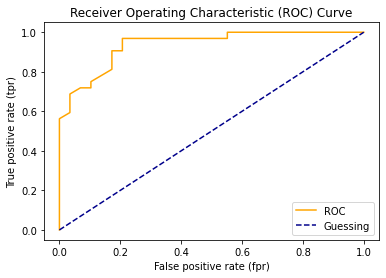

In [129]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots are ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [131]:
# Let's check the AUC 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9364224137931034

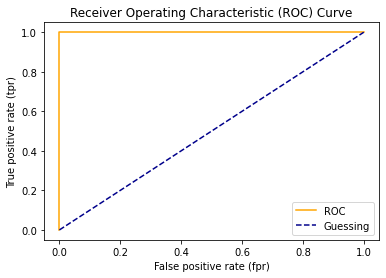

In [134]:
# The perfect model would have area under curve value = 1. 
# Let's demonstrate an example
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [135]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

The confusion matrix is used to compare the labels a model predicts with the actual labels a model is supposed to predict.

In essence, giving you an idea where the model is getting confused.

In [137]:
from sklearn.metrics import confusion_matrix

y_preds = rfc_model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [138]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]])

In [139]:
# Visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, 
            rownames=["Actual Labels"], 
            colnames=["Predicted Labels"]
           )

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


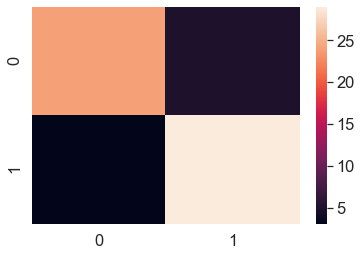

In [145]:
# Make our confusion matrix more visual using Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

As we can see the above confusion matrix has very little communication value. Let's address this by adding some information.

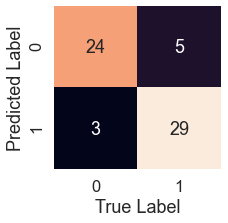

In [148]:
def plot_conf_mat(conf_mat):
    """
    Plot confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, 
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar = False
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
    
plot_conf_mat(conf_mat)    

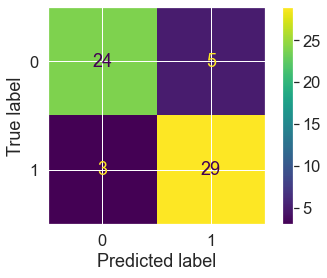

In [152]:
# Using scikit learn's plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc_model, X_test, y_test);

**Classification Report**

Also, a collection of different evaluation metrics report.

### Anatomy of Classification Report

<img src="../images/Anatomy-of-Classification-Report.png"/>

In [161]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [164]:
# When precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True, zero_division='warn'))

/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarise classification metrics :

* **Accuracy** is a good measure to start with if all the classes are balanced (e.g. same amount of samples which are labeled with 0 or 1).
* **Precision** and **Recall** become more important when classes are imbalanced.
* If false positives prediction are worse than false negatives, aim higher **precision**.
* If false negatives predictions are worse than false positives, aim for higher **recall**.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics e
Model evaluation metrics documentation -
https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or co-efficient of determination.
2. Mean absolute error (MAE).
3. Mean squared error (MSE).

**R^2**

What R-sqaured does : Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 
For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts the range of numbers it's R^2 value would be 1.

In [167]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, y_train);

In [168]:
rfr_model.score(X_test, y_test)

0.8654448653350507

In [177]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean.
y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [178]:
# Model only predicting the mean gets an R^2 value of 0.
r2_score(y_test, y_test_mean)

0.0

In [179]:
# Model predicting perfect values gets an R^2 value of 1.
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute difference between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [181]:
from sklearn.metrics import mean_absolute_error

y_preds = rfr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [184]:
df = pd.DataFrame({"Actual Values": y_test,
                  "Predicted Values": y_preds})
df["differences"] = df["Actual Values"] - df["Predicted Values"]
df

,Actual Values,Predicted Values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


In [221]:
exp = df["differences"].abs()

In [223]:
exp.mean()

2.136382352941176

**Mean sqaured error (MSE)**

In [226]:
from sklearn.metrics import mean_squared_error

y_preds = rfr_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [228]:
exp.pow(2).mean()

9.867437068627442